<a href="https://colab.research.google.com/github/ingridmmaciel/LocadoraDeVeiculos/blob/main/C%C3%B3pia_de_LFA_2024_Q1_Automatos_Finitos_na_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linguagens Formais e Autômatos [2024.Q1]**
Prof. Alexandre Donizeti Alves

**AFD**

In [ ]:
def afd(M, w):
  # 'extrai' os elementos da tupla
  δ, q, F = M

  for s in w:
    q = δ[(q, s)]

  return q in F

In [ ]:
# funcao de transicao
δ = {
    ('q1', '0'): 'q1',
    ('q1', '1'): 'q2',
    ('q2', '0'): 'q2',
    ('q2', '1'): 'q3',
    ('q3', '0'): 'q3',
    ('q3', '1'): 'q1'}

In [ ]:
# AFD representado por uma 3-upla, ao invés de uma 5-upla
# O alfabeto e conjunto de estados podem ser inferidos da funcao de transicao
M = (δ, 'q1', ['q2'])

In [ ]:
afd(M, "000111101010000")

False

**AFN**

In [ ]:
def E(estados, δ):
    S = set(estados)
    estadosNaoVisitados = list(estados)
    while len(estadosNaoVisitados) > 0:
        q = estadosNaoVisitados.pop()
        if (q, 'ε') in δ:
            diff = δ[(q, 'ε')].difference(S)
            if len(diff) > 0:
                S.update(diff)
                estadosNaoVisitados.extend(diff)

    return S

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def afn(M, w):

    """
    Verifica se o AFN M aceita a cadeia w

    Entrada:

        - Um AFN M definido por uma tripla (δ, q0, F), onde
            - δ é um dicionário que mapeia um par (q, s) em um
              conjunto de estados, onde q é um estado e s um símbolo do
              alfabeto
            - q0 é o estado inicial
            - F é o conjunto de estados de finais
        - A cadeia w que será verificada

    Saída:

        True se w pertence a linguagem reconhecida por M
        False caso contrário
    """

    # 'extrai' os elementos da tupla
    δ, q0, F = M

    estadosAtivos = E({q0}, δ)
    for s in w:
        novosEstadosAtivos = set()
        for q in estadosAtivos:
            if (q, s) in δ:
                novosEstadosAtivos.update(E(δ[(q, s)], δ))
        estadosAtivos = novosEstadosAtivos

    return len(estadosAtivos.intersection(F)) != 0

In [ ]:
# funcao de transicao do AFN M
δ = {
    ('q1', '0'): {'q1'},
    ('q1', '1'): {'q2'},
    ('q2', '0'): {'q2'},
    ('q2', '1'): {'q3'},
    ('q3', '0'): {'q3'},
    ('q3', '1'): {'q1'}}

In [ ]:
# AFN representado por uma 3-upla
M = (δ, 'q1', {'q3'})

In [ ]:
afn(M, "001100")

True

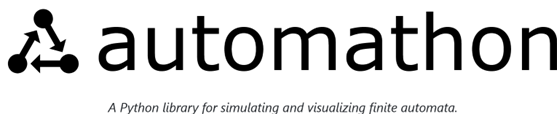

In [ ]:
!pip install automathon --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for automathon: filename=automathon-0.0.13-py3-none-any.whl size=18929 sha256=235f7c948405703fd826387f4b58762f2fb53590c85f838e24f17cd9897db960
  Stored in directory: /root/.cache/pip/wheels/2d/e7/9e/3e4d1e29780df3f61ea8b890b1be00a0f8d4a021139f927dd6
Successfully built automathon
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


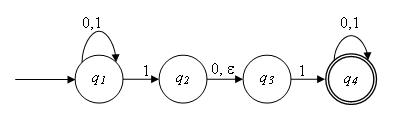

In [ ]:
from automathon import DFA

Q = {'q1', 'q2', 'q3'}
sigma = {'0', '1'}
delta = { 'q1' : {'0' : 'q2', '1' : 'q2'},
          'q2' : {'0' : 'q2', '1' : 'q3'},
          'q3' : {'0' : 'q2', '1' : 'q1'}
        }
initial_state = 'q1'
F = {'q2'}

automata = DFA(Q, sigma, delta, initial_state, F)

In [ ]:
automata.is_valid()

True

In [ ]:
automata.accept("001001")

False

In [ ]:
automata.accept("00100")

True

In [ ]:
not_automata = automata.complement()
not_automata.accept("00100")

False

In [ ]:
automata_nfa = automata.get_nfa()
automata_nfa.accept("001001")

False

 **`Visualização`**

In [ ]:
# estilo default
automata.view("afd01")

In [ ]:
# estilo personalizado
automata.view(
    file_name="afd01_personalizado",
    node_attr={'fontsize': '20'},
    edge_attr={'fontsize': '20pt'}
)

**AFN**

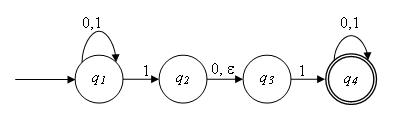

In [ ]:
from automathon import NFA

## Epsilon Transition is denoted by '' -> Empty string
q = {'q1', 'q2', 'q3'}
sigma = {'0', '1'}
delta = {
    'q1' : {
            '0' : {'q2'},
            '1' : {'q2'},
            '' :  {'q1'}
            },
    'q2' : {
            '0' : {'q2'},
            '1' : {'q3'},
            '' :  {'q2'}
            },
    'q3' : {
            '0' : {'q2'},
            '1' : {'q1'},
            '' :  {'q3'}
            }
}
initial_state = 'q1'
f = {'q2'}

automata = NFA(q, sigma, delta, initial_state, f)

In [ ]:
automata.is_valid()

True

In [ ]:
#print(automata.accept("0000011"))
#print(automata.accept("000001")) #Está ficando em loop , porém deveria retornar False por não ser o estado final.

In [ ]:
not_automata = automata.complement()
not_automata.accept("000001")

True

**`Visualização`**

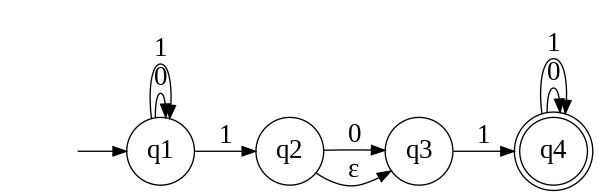

In [ ]:
# estilo default
automata.view("afn01")

# estilo personalizado
automata.view(
    file_name="afn01_personalizado",
    node_attr={'fontsize': '20'},
    edge_attr={'fontsize': '20pt'}
)

**`Transições Vazias`**

In [ ]:
automata.contains_epsilon_transitions()

True

In [ ]:
automata_1 = automata.remove_epsilon_transitions()

print(automata_1.accept("0000011"))
print(automata_1.accept("000001"))

False
False


In [ ]:
automata_1.view("afn02")

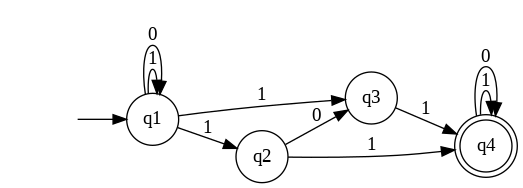

**`AFN para AFD`**

In [ ]:
automata_3 = automata.get_dfa()

print(automata_3.accept("0000011"))
print(automata_3.accept("000001"))

False
False


In [ ]:
automata_3.view("afn_afd")

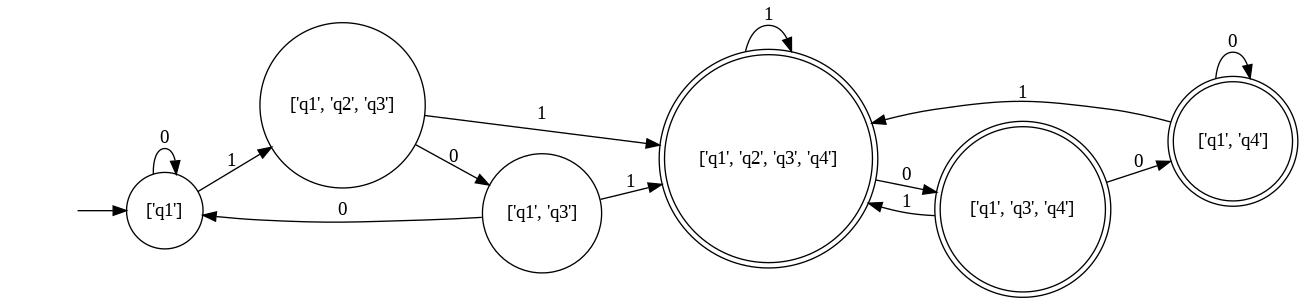

In [ ]:
automata_4 = automata_3.get_nfa()

print(automata_4.accept("0000011"))
print(automata_4.accept("000001"))

False
False


In [ ]:
automata_4.view("afn_04")

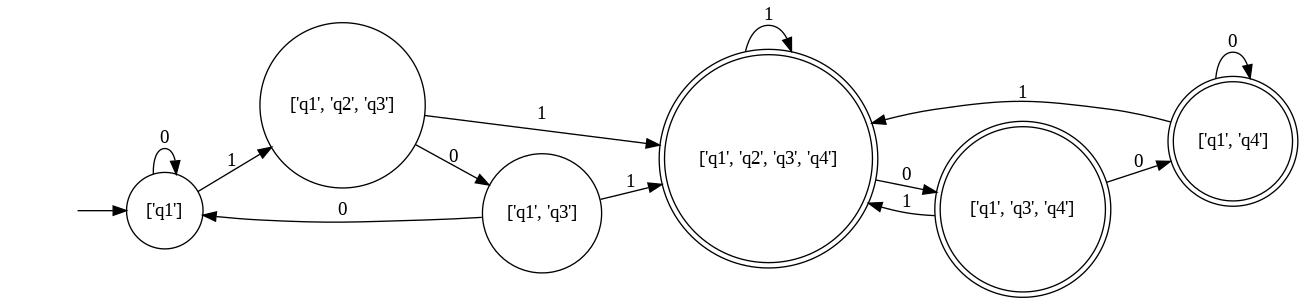

In [ ]:
automata_4.renumber()

print(automata_4.accept("0000011"))
print(automata_4.accept("000001"))

False
False


In [ ]:
automata_4.view("afn_04_renomeado")

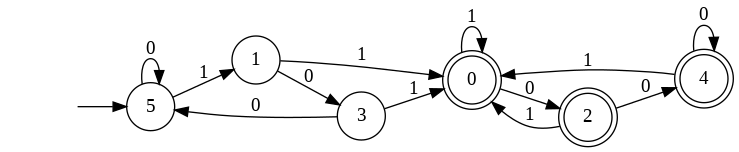

**`Minimização`**

In [ ]:
automata_2 = automata.minimize()

print(automata_2.accept("0000011"))
print(automata_2.accept("000001"))

False
False


In [ ]:
automata_2.view("af_minimizado")

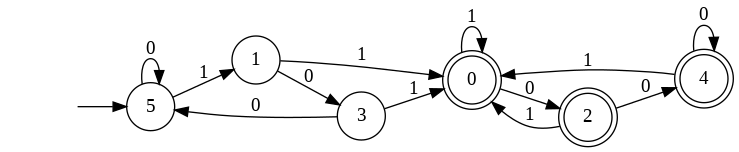

In [ ]:
automata_2.view("af_minimizado_renomeado")

**Referências:**

https://github.com/rohaquinlop/automathon

https://rohaquinlop.github.io/automathon/